You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges times[i] = (ui, vi, wi), where ui is the source node, vi is the target node, and wi is the time it takes for a signal to travel from source to target.

We will send a signal from a given node k. Return the time it takes for all the n nodes to receive the signal. If it is impossible for all the n nodes to receive the signal, return -1.

 

Example 1:

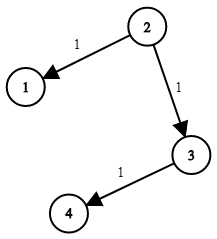

Input: times = [[2,1,1],[2,3,1],[3,4,1]], n = 4, k = 2
Output: 2

Example 2:

Input: times = [[1,2,1]], n = 2, k = 1
Output: 1

Example 3:

Input: times = [[1,2,1]], n = 2, k = 2
Output: -1

 

Constraints:

    1 <= k <= n <= 100
    1 <= times.length <= 6000
    times[i].length == 3
    1 <= ui, vi <= n
    ui != vi
    0 <= wi <= 100
    All the pairs (ui, vi) are unique. (i.e., no multiple edges.)



In [16]:
from typing import List
from collections import deque
from math import inf

class Solution:
    def networkDelayTime(self, times: List[List[int]], n: int, k: int) -> int:
        graph = {i + 1: {} for i in range(n)}
        for start, end, time in times:
            graph[start][end] = time
        times = {i + 1: inf for i in range(n)}
        
        q = deque()
        q.append([k, 0])
        while q:
            curr, time = q.popleft()
            if times[curr] > time:
                times[curr] = time
                for cand in graph[curr].keys():
                    q.append([cand, time + graph[curr][cand]])
        if max(times.values()) == inf:
            return -1
        else:
            return max(times.values())

In [17]:
s = Solution()
s.networkDelayTime([[2,1,1],[2,3,1],[3,4,1]], 4, 2)

2

In [18]:
s.networkDelayTime([[1,2,1]], 2, 1)

1

In [19]:
s.networkDelayTime([[1,2,1]], 2, 2)

-1